# Challenge Name   : Multi Class Classification
# Challenge ID         : DL_NLP_Hack_02

### Author                   : Anoop Sharma
### Sap ID                   : 51719622

## Challenge Description

#####  1. This problem is related to Multi Class Classification which comes under Deep Learning Umbrella
####   2. Provided with medical domain dataset, We need to predict patient condition based on reviews
####   3. Evaluation Criteria :
        a) Performance Matrix : Prediction/True Table > 85%
        b) New Technique : Use latest NLP model with transfer learning
####   4. Proposed Solution :
        a) We will train the model in such  way that it can predict the patient health condition based on       reviews using ML and DL algorithms.This problem is related to NLP (Neuro-Linguistics programming)
        b) Process to proceeds in the order of Data exploration --> Data preprocessing -->Model --> Conclusion--> Limit  

####   5. Data details :
         Patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction
         a) drugsComTrain_raw.csv -- Training Data with history of reviews
         b) Train Shape - (161297, 7)
         c) Columns Details :
                 drugName (categorical): name of drug
                 condition (categorical): name of condition
                 review (text): patient review
                 rating (numerical): 10 star patient rating
                 date (date): date of review entry
                 usefulCount (numerical): number of users who found review useful
        

In [0]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [20]:
#Open drugreview files
df_train=pd.read_csv("drugsComTrain_raw.csv")
print("Train Data format " ,df_train.head())
print("Train Data shape ",df_train.shape)
print("Condition count in Train dataset ", df_train['condition'].value_counts())
df_train_cond_rev=df_train[['condition','review']].copy()
df_temp=df_train_cond_rev[pd.notnull(df_train_cond_rev['review'])]
df_train_fil=df_temp[pd.notnull(df_temp['condition'])]
print("Dataset with columns Condition and review" , df_train_fil)
print("Dataset with columns Condition and review dimension " ,df_train_fil.shape)

Train Data format     uniqueID                  drugName  ...       date usefulCount
0    206461                 Valsartan  ...  20-May-12          27
1     95260                Guanfacine  ...  27-Apr-10         192
2     92703                    Lybrel  ...  14-Dec-09          17
3    138000                Ortho Evra  ...   3-Nov-15          10
4     35696  Buprenorphine / naloxone  ...  27-Nov-16          37

[5 rows x 7 columns]
Train Data shape  (161297, 7)
Condition count in Train dataset  Birth Control                                   28788
Depression                                       9069
Pain                                             6145
Anxiety                                          5904
Acne                                             5588
                                                ...  
Postoperative Increased Intraocular Pressure        1
Cluster-Tic Syndrome                                1
Bartonellosis                                       1
Cachexia     

In [21]:
# Clean patient condition label with bad data
df_comment = df_train_fil[df_train_fil['condition'].str.contains('comment')]
df_comment

,condition,review
105,2</span> users found this comment helpful.,"""I&#039;m 16 and I have been on Loestrin 24 f..."
196,4</span> users found this comment helpful.,"""I&#039;m 24 years old and have always had a p..."
243,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a..."
264,4</span> users found this comment helpful.,"""Took this pill for 1.) Acne and 2.) Birth Con..."
391,11</span> users found this comment helpful.,"""I have suffered with low back pain - 2 surger..."
...,...,...
160322,99</span> users found this comment helpful.,"""Great pill... You can definitely see it worki..."
160791,62</span> users found this comment helpful.,"""I am sharing a painful experience actually. T..."
160899,7</span> users found this comment helpful.,"""I&#039;ve been taking Geodon for about a mont..."
160921,92</span> users found this comment helpful.,"""At 300mg 4x daily my pain was almost gone. """


In [22]:
# Dropping rows that contain incorrect information 

df_train_fil = df_train_fil[~df_train_fil['condition'].str.contains('comment')]
print(df_train_fil.shape)

(159498, 2)


Birth Control                               28788
Depression                                   9069
Pain                                         6145
Anxiety                                      5904
Acne                                         5588
                                            ...  
Paragonimus westermani, Lung Fluke              1
Epicondylitis, Tennis Elbow                     1
Secondary Cutaneous Bacterial Infections        1
Syringomyelia                                   1
Hemophilia B                                    1
Name: condition, Length: 811, dtype: int64


Text(0.5, 1.0, 'Top 50  : The number of reviews per patient condition.')

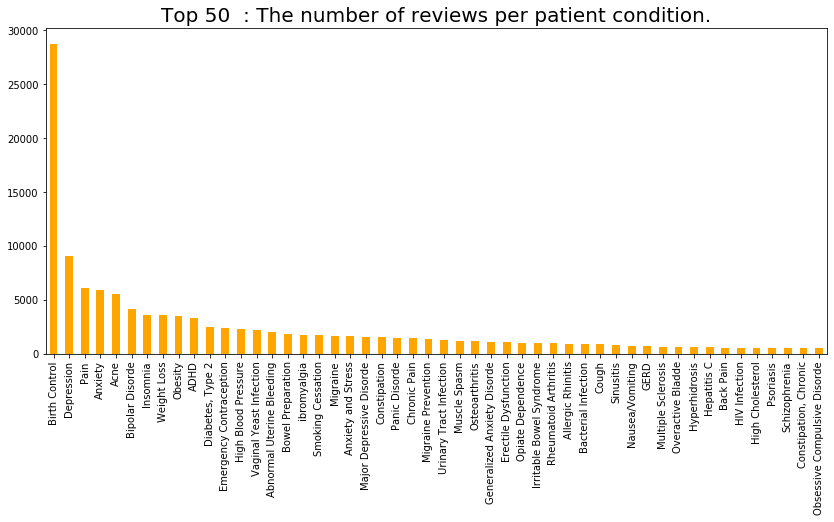

In [23]:
# Data plot based on review and condition
df_condition=df_train_fil.condition.value_counts()
print(df_condition)
df_condition[0:50].plot(kind="bar", figsize = (14,6), fontsize = 10,color="orange")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top 50  : The number of reviews per patient condition.", fontsize = 20)

In [24]:
value_counts=df_train_fil['condition'].value_counts()
# Select the values where the count is less than 3 (or 5 if you like)
print(value_counts)

Birth Control                               28788
Depression                                   9069
Pain                                         6145
Anxiety                                      5904
Acne                                         5588
                                            ...  
Paragonimus westermani, Lung Fluke              1
Epicondylitis, Tennis Elbow                     1
Secondary Cutaneous Bacterial Infections        1
Syringomyelia                                   1
Hemophilia B                                    1
Name: condition, Length: 811, dtype: int64


In [25]:

to_remove = value_counts[value_counts <= 800].index
# Keep rows where the city column is not in to_remove
df_train_fil = df_train_fil[~df_train_fil.condition.isin(to_remove)]
print(" Dataset after removal",df_train_fil.shape)
df_train_fil.condition.value_counts()

 Dataset after removal (114796, 2)


Birth Control                  28788
Depression                      9069
Pain                            6145
Anxiety                         5904
Acne                            5588
Bipolar Disorde                 4224
Insomnia                        3673
Weight Loss                     3609
Obesity                         3568
ADHD                            3383
Diabetes, Type 2                2554
Emergency Contraception         2463
High Blood Pressure             2321
Vaginal Yeast Infection         2274
Abnormal Uterine Bleeding       2096
Bowel Preparation               1859
ibromyalgia                     1791
Smoking Cessation               1780
Migraine                        1694
Anxiety and Stress              1663
Major Depressive Disorde        1607
Constipation                    1595
Panic Disorde                   1463
Chronic Pain                    1455
Migraine Prevention             1413
Urinary Tract Infection         1316
Muscle Spasm                    1244
O

In [0]:
df_train_fil.replace({'condition':{'Generalized Anxiety Disorde': 'Anxiety Disorder','Anxiety and Stress': 'Anxiety Disorder','Anxiety':'Anxiety Disorder','Major Depressive Disorde':'Depression'}},inplace= True)

In [27]:
df_train_fil.condition.unique()

array(['ADHD', 'Birth Control', 'Opiate Dependence',
       'Emergency Contraception', 'Bipolar Disorde',
       'Migraine Prevention', 'Depression', 'Cough', 'Obesity',
       'Urinary Tract Infection', 'ibromyalgia', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection', 'Panic Disorde',
       'Migraine', 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Muscle Spasm',
       'Diabetes, Type 2', 'Smoking Cessation', 'Anxiety Disorder',
       'Acne', 'Erectile Dysfunction', 'Chronic Pain',
       'High Blood Pressure', 'Allergic Rhinitis',
       'Abnormal Uterine Bleeding', 'Weight Loss', 'Bacterial Infection',
       'Sinusitis'], dtype=object)

Birth Control                28788
Depression                   10676
Anxiety Disorder              8731
Pain                          6145
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Constipation                  1595
Panic Disorde                 1463
Chronic Pain                  1455
Migraine Prevention           1413
Urinary Tract Infection       1316
Muscle Spasm                  1244
Osteoarthritis                1239
Erectile Dysfunction          1086
Opiate Dependence             1079
Irritable Bowel Synd

Text(0.5, 1.0, 'Top 34  : The number of reviews per patient condition.')

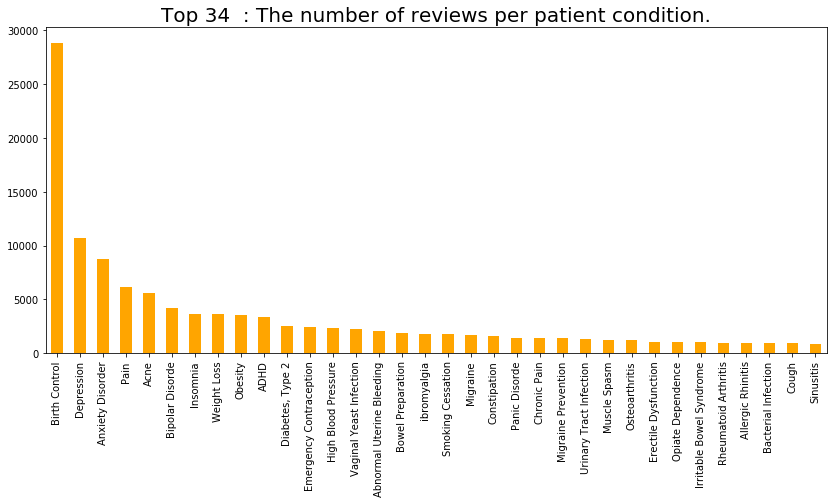

In [28]:
# Data plot based on review and condition
df_condition=df_train_fil.condition.value_counts()
print(df_condition)
df_condition[0:34].plot(kind="bar", figsize = (14,6), fontsize = 10,color="orange")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top 34  : The number of reviews per patient condition.", fontsize = 20)

In [30]:
df_train_fil = df_train_fil.sample(frac=0.5, replace=True, random_state=1).copy()
df_train_fil.shape

(28699, 2)

In [32]:
#Clean review comments
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@\d+]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z00-99 #+_]')
add_stop = ['', ' ', 'say', 's', 'u', 'ap', 'afp', '...', 'n', '\\','this','will','doctor','took','got','month','an','weight','if','one','week','when','more','are','weeks','are','would','just','feel','day',
 'im','though','daily','found','daily','found','give','7','gained','happy','sure','told','less','gave','three',
 'side','taking','ive','years','first','effects','take','started','like','months','get','days','time','2','feel','would','3',
 'back', 'also','dont','since', 'also','dont','since', 'cant','stop','morning','however','taken','within','see''good','night',
 'even','year','great','ago','4','tried','little','5','dose','used','worked','1','getting','could','10','almost','put','6','use',
 'nothing','far','helped','normal','gain','recommend','without','long','thing','make','many','noticed','said','ood','best',
 'thought','gone','working','couldnt','anything','something','spotting','things','people','second','need','20','way','half',
 'start','another','completely','wasnt','everything','8','face','bit','high','worth','definitely','pretty','decided','actually',
 'lbs','effective','past','today','helps','heavy','new','may','doesnt','30','minutes','15','problem','dry','came','reviews','shot','issues','trying','switched','depressed','12','full','sometimes','find','meds','change','anyone','caused','thats','results','done','increased','twice','energy','fine','several','hard','read','given','pressure','come','clear','eating','already','insurance','everyone','dosage','mouth','amazing','id','enough','wanted','overall','maybe','began','really','still','never','much','work','went','two','didnt','go','made','works','going','mg','hours','last','ever','lost','lot','try','think','stopped',
 'away','know','times','always','havent','next','due','want','around','experienced','finally','able','right','later','different','hour','keep','dr','changed','makes','least','else','difference','seems','needed','product',
 'point','soon','absolutely','anymore','usually','drink','free','stay','became','recently','awful','small','hoping','believe','felt','better','good','every','well','help','feeling','prescribed','severe','experience','using','effect','worse','body','old','love','see','symptoms','eat','drive','problems','light','starting','insertion','attacks','hope','bed','plan','negative','crazy','major','9','whole','gotten','quit','removed','extreme','food','pack','lasted','end','patch','everyday','constant','person','25','reason','others','medications','thoughts','24','yet','tell','reading','etc','regular','although','suffered','cause','10mg','along','asleep','wake','remember','medicines','100','doctors','hair','left','immediately','hurt','part','constantly','school','per','highly','burning','mind','break','positive','b','super','slight','big','short','head','notice','probably','cycle','deal','cleared','either','woke','seem','wish','increase','wait','boyfriend','let','four','50','18','wouldnt','scared','23','20mg','quite','stuff','continue','takes','thinking','literally','worry','beginning','might','recommended','treatment','early','plus','experiencing','taste','home','seemed','huge','ended','kept','easy','husband','doc','hungry','suffer','crying','wont','third','switch','except','become','isnt','prescription','making','16','coming','family','40','fall','yes','goes','luck','quickly','entire','2015','currently','looking','fast','glad','fatigue','attack','please','straight','yrs','2nd','can','not','thank','dreams','withdrawal','trouble','3rd','cream','happened','fact','function','care','often','kind','50mg','hate','kids','amount','late','especially','instead','gets','switching','wonderful','issue','changes','losing','chest','saved','broke','level','worried','live','totally','loved','14','lighter','type','active','nearly','age','prior','feels','intense','real','1st','son','45','rather','baby','decreased','improved','slowly','someone','focus','self','lots','size','normally','5mg','hospital','irregular','six','yesterday','nervous','rest','cry','uncomfortable','supposed','hopefully','guess','drinking','procedure','knew','called','improvement','giving','11','34','youre','walk','form','asked','slightly','developed','bathroom','expensive','suggested','17','look','okay','sleepy','ok','eventually','course','add','2016','knee','stick','must','brand','five','sensitive','health','wonders','minor','child','comes','none','breakouts','hasnt','adderall','saw','cost','review','unfortunately','red','100mg','leave','affects','occasional','helping','hot','breakthrough','serious','possible','usual','zero','single','pay','perfect','levels','hell','nights','sad','legs','total','friends','handle','doses','seen','difficult','prep','easily','13','throughout','slept','minimal','god','social','continued','turned','mine','reduced','seeing','strong','term','ready','truly','upset','happen','lasts','unbearable','wrong','rid','mostly','evening','says','unprotected','march','case','children','place','25mg','vyvanse','moderate','awesome','pm','reaction','post','60','female','causing','higher','easier']

STOPWORDS = set(stopwords.words('english'))
stop_words=STOPWORDS.union(add_stop)
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
        # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in stop_words) # delete stopwors from text
    return text
    
df_train_fil['review'] = df_train_fil['review'].apply(clean_text)
#print_plot(10)
df_train_fil

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,condition,review
76344,Obesity,belviq urge anybody share thanks
132234,Osteoarthritis,knees replacednot bone bone hearing mixed repl...
38095,Anxiety Disorder,psychiatrist luvox close stress anxiety medica...
61774,High Blood Pressure,lisinopril bad nightly cough common interrupte...
51034,Pain,mid injury squatting gym pain progressively st...
...,...,...
28406,Constipation,pill rev condensed gentle overnight relief box...
20801,Vaginal Yeast Infection,itching fire ants vagina oozing medicine itchi...
148465,Bowel Preparation,understand horror stories suprep tastes grape ...
87578,Muscle Spasm,menstrual cramps significant buzz


In [33]:
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
reviews = df_train_fil.review.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:200]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
23262


['pain',
 'pill',
 'period',
 'anxiety',
 'bad',
 'medication',
 'life',
 'control',
 'acne',
 'birth',
 'medicine',
 'depression',
 'sleep',
 'bleeding',
 'periods',
 'mood',
 'sex',
 'cramps',
 'drug',
 'skin',
 'nausea',
 'pills',
 'horrible',
 'blood',
 'pounds',
 'swings',
 'headaches',
 'stomach',
 'panic',
 'worst',
 'couple',
 'appetite',
 'pregnant',
 'cramping',
 'loss',
 'painful',
 'tired',
 'migraines',
 'terrible',
 'extremely',
 'longer',
 'water',
 'th',
 'relief',
 'inserted',
 'headache',
 'mirena',
 'low',
 'insomnia',
 'ill',
 'mild',
 'lose',
 'lexapro',
 'infection',
 'sick',
 'nexplanon',
 'med',
 'diagnosed',
 'pregnancy',
 'sleeping',
 'nauseous',
 'disorder',
 'lower',
 'x',
 'diet',
 'migraine',
 'iud',
 'bc',
 'implanon',
 'zoloft',
 'job',
 'chronic',
 'exercise',
 'xanax',
 'heart',
 'emotional',
 'stress',
 'diarrhea',
 'miracle',
 'dizzy',
 'cymbalta',
 'constipation',
 'implant',
 'moody',
 'skyla',
 'bipolar',
 'nd',
 'wellbutrin',
 'muscle',
 'er',
 '

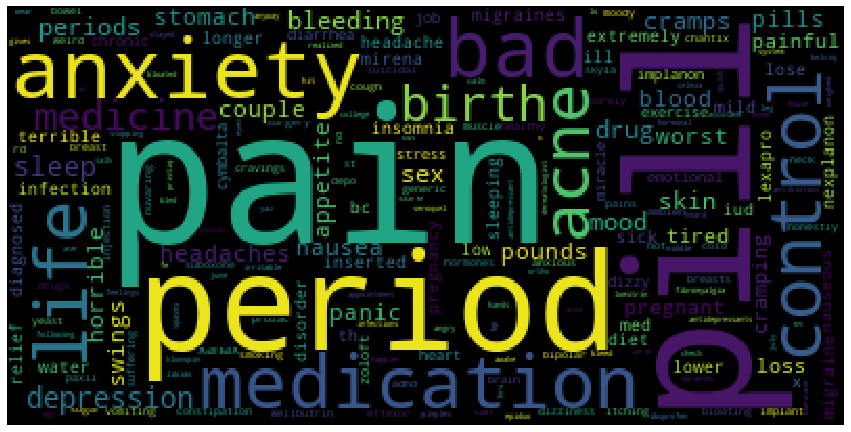

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.figure( figsize=(15,8) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [35]:

df_train_fil.review.describe()

count     28699
unique    19142
top            
freq        213
Name: review, dtype: object

In [36]:
# Create a new column 'category_id' with encoded categories 
df_train_fil['condition_id'] = df_train_fil['condition'].factorize()[0]
category_id_df = df_train_fil[['condition', 'condition_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['condition_id', 'condition']].values)

# New dataframe
df_train_fil.condition_id.value_counts()

6     7186
10    2787
2     2132
4     1469
7     1337
14    1054
18     944
15     897
12     860
0      840
16     659
8      653
3      611
5      592
21     519
13     468
30     447
23     431
32     400
9      398
20     365
19     349
11     345
25     326
33     311
24     307
1      301
29     277
28     265
27     259
22     258
26     246
17     219
31     187
Name: condition_id, dtype: int64

In [37]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each review into a vector
features = tfidf.fit_transform(df_train_fil.review).toarray()
#dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

labels = df_train_fil.condition_id

print("Each of the %d review is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 28699 review is represented by 8097 features (TF-IDF score of unigrams and bigrams)


In [0]:

X = df_train_fil['review'] # Collection of documents
y = df_train_fil['condition'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    stratify=y)


In [39]:
print('Number of data points in train data:', y_train.shape[0])
print('Number of data points in test data:', y_test.shape[0])

Number of data points in train data: 22959
Number of data points in test data: 5740


In [40]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

In [41]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.848767,0.005678
LogisticRegression,0.785941,0.008595
MultinomialNB,0.666748,0.002818
RandomForestClassifier,0.251404,0.001032


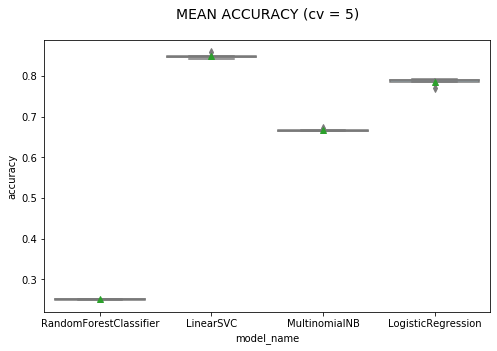

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [46]:

model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([ 4,  6, 10, ...,  6,  5, 33])

In [47]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       217
           1       0.92      0.68      0.78        87
           2       0.74      0.76      0.75       522
           3       0.85      0.85      0.85       154
           4       0.77      0.83      0.80       360
           5       0.97      0.93      0.95       149
           6       0.91      0.97      0.94      1797
           7       0.94      0.92      0.93       353
           8       0.97      0.92      0.94       155
           9       0.97      0.95      0.96        99
          10       0.75      0.81      0.78       698
          11       0.85      0.88      0.86        90
          12       0.89      0.86      0.87       207
          13       0.90      0.93      0.92       130
          14       0.80      0.77      0.79       282
          15       0.72      0.79      0.75       220
          16       0.92      0.90      0.91       17

Text(0.5, 1, 'CONFUSION MATRIX - LinearSVC\n')

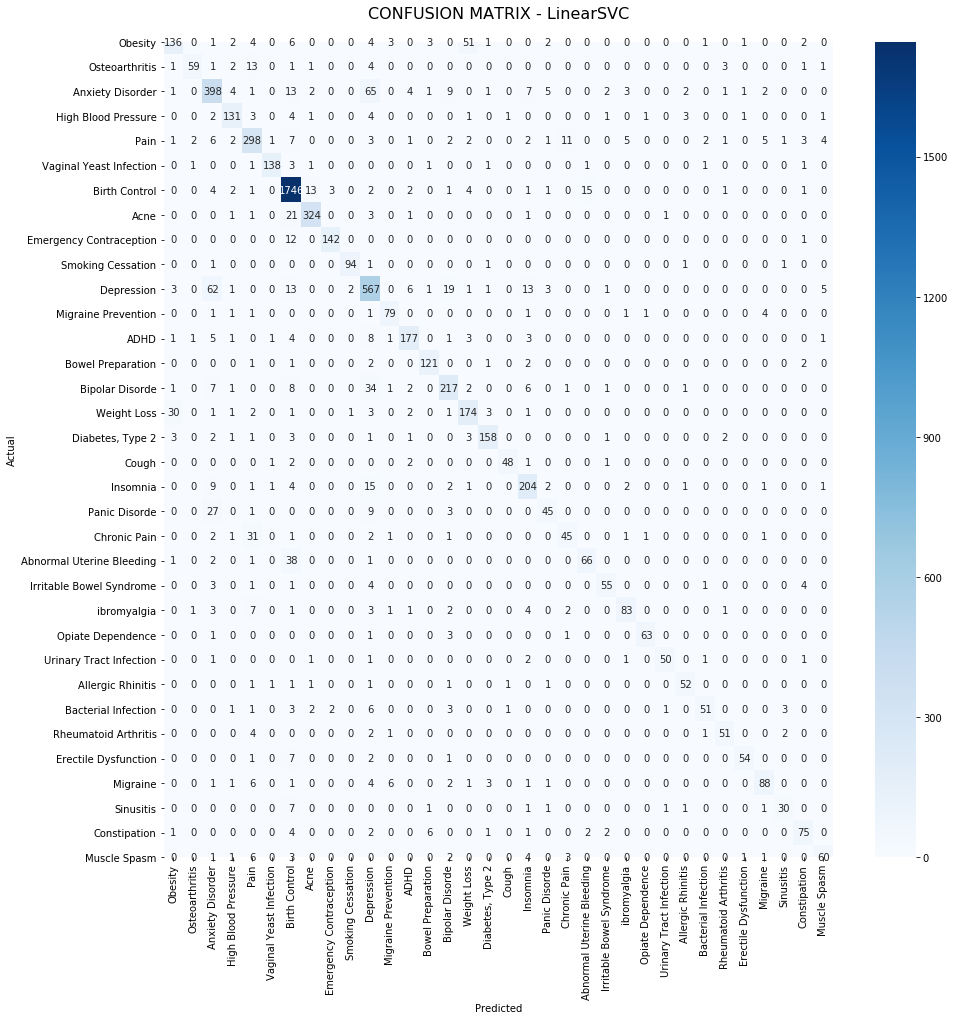

In [48]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.condition.values, 
            yticklabels=category_id_df.condition.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16)